In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# load data
X, y = datasets.load_diabetes(return_X_y=True)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Define the optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

In [4]:
# create model
model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_adam.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_adam.add(keras.layers.Dense(units=1))

model_sgd = keras.models.Sequential()
model_sgd.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_sgd.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_sgd.add(keras.layers.Dense(units=1))

model_adagrad = keras.models.Sequential()
model_adagrad.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_adagrad.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_adagrad.add(keras.layers.Dense(units=1))

model_momentum = keras.models.Sequential()
model_momentum.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_momentum.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_momentum.add(keras.layers.Dense(units=1))


In [5]:
# compile model
model_adam.compile(optimizer=adam, loss='huber',
              metrics=['mae'])
model_adagrad.compile(optimizer=adagrad, loss='huber',
              metrics=['mae'])
model_sgd.compile(optimizer=sgd, loss='huber',
              metrics=['mae'])
model_momentum.compile(optimizer=momentum, loss='huber',
              metrics=['mae'])

In [6]:
# train model
history_adam = model_adam.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_momentum = model_momentum.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 145.5239 - mae: 146.0239 - val_loss: 135.9690 - val_mae: 136.4690
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 112.9873 - mae: 113.4870 - val_loss: 83.8548 - val_mae: 84.3525
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 72.8376 - mae: 73.3343 - val_loss: 55.1948 - val_mae: 55.6897
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 62.1369 - mae: 62.6353 - val_loss: 49.6102 - val_mae: 50.1102
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 54.2552 - mae: 54.7541 - val_loss: 52.5418 - val_mae: 53.0418
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 49.2402 - mae: 49.7394 - val_loss: 45.4490 - val_mae: 45.9487
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 46.5437 - mae: 47.0391 - val_loss: 45.2220 - val_mae: 45.7205
Epoch 8/100
12/12 [=============================

In [7]:
# evaluate model
score_adam = model_adam.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Adam: {score_adam["loss"]:.4f}')

score_adagrad = model_adagrad.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Adagrad: {score_adagrad["loss"]:.4f}')

score_sgd = model_sgd.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - SGD: {score_sgd["loss"]:.4f}')

score_momentum  = model_momentum.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Momentum: {score_momentum["loss"]:.4f}')

3/3 [==============================] - 0s 1ms/step - loss: 45.2312 - mae: 45.7309
Test loss - Adam: 45.2312
3/3 [==============================] - 0s 2ms/step - loss: 46.0164 - mae: 46.5164
Test loss - Adagrad: 46.0164
3/3 [==============================] - 0s 1ms/step - loss: 47.8226 - mae: 48.3218
Test loss - SGD: 47.8226
3/3 [==============================] - 0s 2ms/step - loss: 47.4114 - mae: 47.9089
Test loss - Momentum: 47.4114


In [8]:
# make predictions
predictions_adam = model_adam.predict(X_test)
predictions_adagrad = model_adagrad.predict(X_test)
predictions_sgd = model_sgd.predict(X_test)
predictions_momentum = model_momentum.predict(X_test)

3/3 [==============================] - 0s 3ms/step


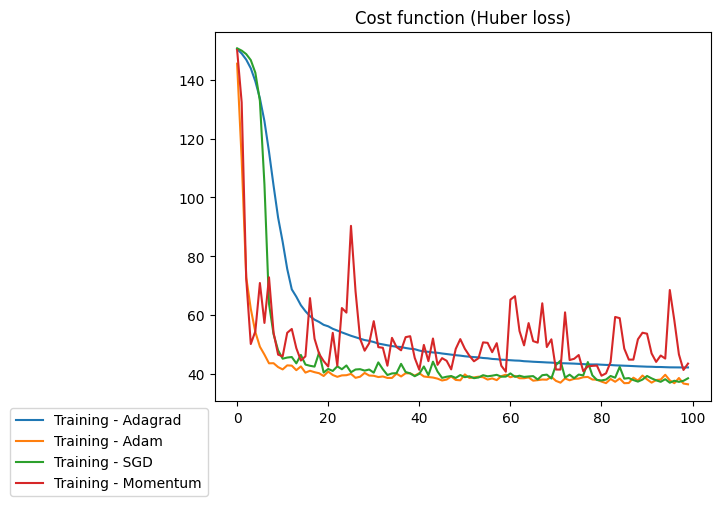

In [9]:
# plot optimization process
plt.plot(history_adagrad.history['loss'], label='Training - Adagrad')

plt.plot(history_adam.history['loss'], label='Training - Adam')

plt.plot(history_sgd.history['loss'], label='Training - SGD')

plt.plot(history_momentum.history['loss'], label='Training - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Cost function (Huber loss)')

plt.show()



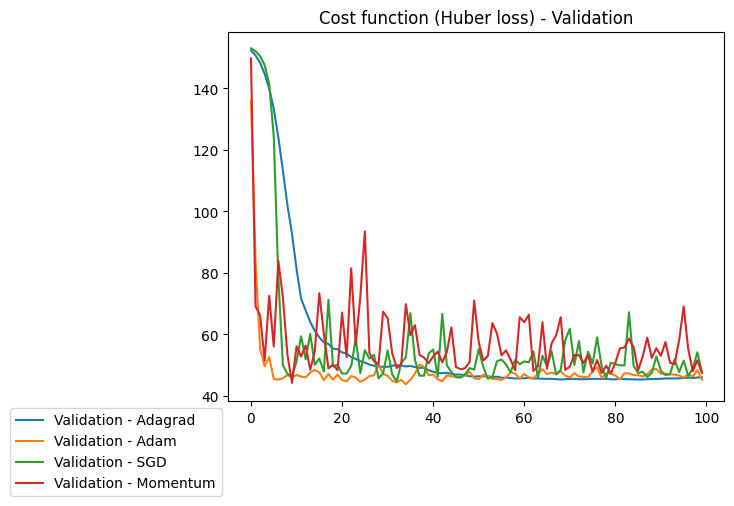

In [10]:
# plot optimization process
plt.plot(history_adagrad.history['val_loss'], label='Validation - Adagrad')

plt.plot(history_adam.history['val_loss'], label='Validation - Adam')

plt.plot(history_sgd.history['val_loss'], label='Validation - SGD')

plt.plot(history_momentum.history['val_loss'], label='Validation - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Cost function (Huber loss) - Validation')

plt.show()

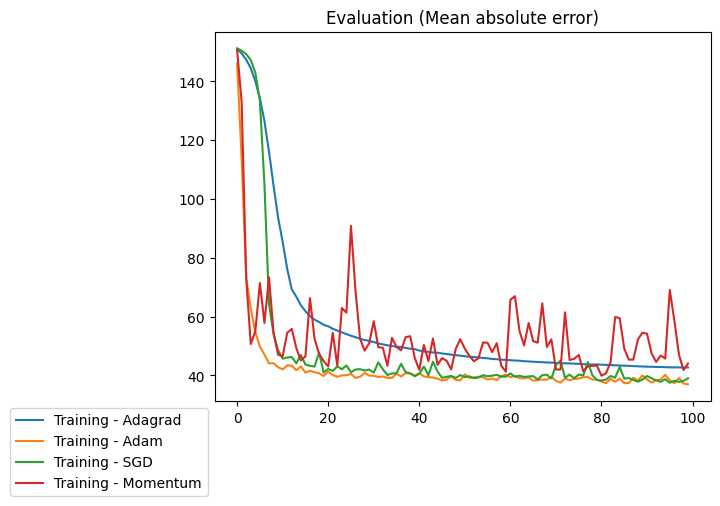

In [11]:
# plot optimization process
plt.plot(history_adagrad.history['mae'], label='Training - Adagrad')

plt.plot(history_adam.history['mae'], label='Training - Adam')

plt.plot(history_sgd.history['mae'], label='Training - SGD')

plt.plot(history_momentum.history['mae'], label='Training - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Evaluation (Mean absolute error)')

plt.show()



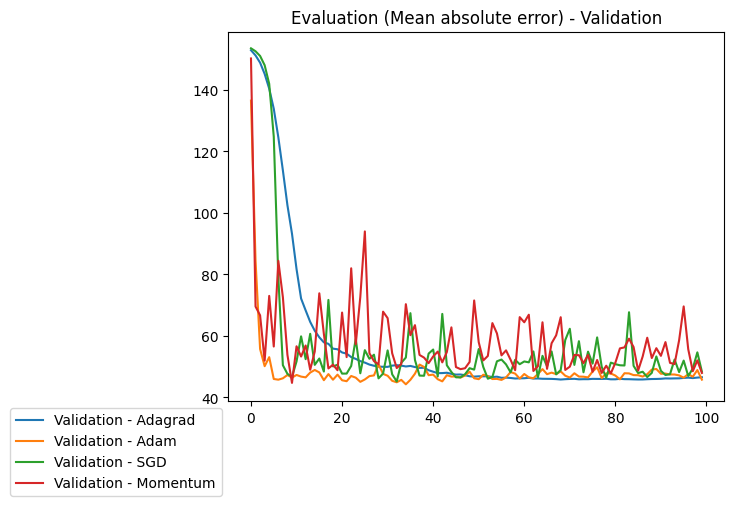

In [12]:
# plot optimization process
plt.plot(history_adagrad.history['val_mae'], label='Validation - Adagrad')

plt.plot(history_adam.history['val_mae'], label='Validation - Adam')

plt.plot(history_sgd.history['val_mae'], label='Validation - SGD')

plt.plot(history_momentum.history['val_mae'], label='Validation - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Evaluation (Mean absolute error) - Validation')

plt.show()

In [13]:
def describe_optimization_results(scores, histories):
    # Find the optimizer with the lowest test loss
    best_optimizer = min(scores, key=lambda x: scores[x]['loss'])

    # Calculate percentage difference between the test losses
    loss_diff = {}
    for opt1 in scores:
        loss_diff[opt1] = {}
        for opt2 in scores:
            if opt1 != opt2:
                loss_diff[opt1][opt2] = (scores[opt1]['loss'] - scores[opt2]['loss']) / scores[opt2]['loss'] * 100

    # Generate textual summary
    summary = f"The optimizer with the lowest test loss is {best_optimizer}, with a test loss of {scores[best_optimizer]['loss']:.4f}.\n"
    for opt1 in loss_diff:
        for opt2 in loss_diff[opt1]:
            summary += f"{opt1} has a {abs(loss_diff[opt1][opt2]):.2f}% {'lower' if loss_diff[opt1][opt2] < 0 else 'higher'} test loss compared to {opt2}.\n"

    # Training convergence analysis
    for opt in histories:
        min_loss_epoch = np.argmin(histories[opt]['loss']) + 1
        min_loss = np.min(histories[opt]['loss'])
        summary += f"{opt} achieved its minimum training loss of {min_loss:.4f} at epoch {min_loss_epoch}.\n"

    return summary

scores = {
    'Adam': score_adam,
    'Adagrad': score_adagrad,
    'SGD': score_sgd,
    'Momentum': score_momentum
}

histories = {
    'Adam': history_adam.history,
    'Adagrad': history_adagrad.history,
    'SGD': history_sgd.history,
    'Momentum': history_momentum.history
}

result_summary = describe_optimization_results(scores, histories)
print(result_summary)


The optimizer with the lowest test loss is Adam, with a test loss of 45.2312.
Adam has a 1.71% lower test loss compared to Adagrad.
Adam has a 5.42% lower test loss compared to SGD.
Adam has a 4.60% lower test loss compared to Momentum.
Adagrad has a 1.74% higher test loss compared to Adam.
Adagrad has a 3.78% lower test loss compared to SGD.
Adagrad has a 2.94% lower test loss compared to Momentum.
SGD has a 5.73% higher test loss compared to Adam.
SGD has a 3.93% higher test loss compared to Adagrad.
SGD has a 0.87% higher test loss compared to Momentum.
Momentum has a 4.82% higher test loss compared to Adam.
Momentum has a 3.03% higher test loss compared to Adagrad.
Momentum has a 0.86% lower test loss compared to SGD.
Adam achieved its minimum training loss of 36.4400 at epoch 100.
Adagrad achieved its minimum training loss of 42.1599 at epoch 99.
SGD achieved its minimum training loss of 36.9876 at epoch 96.
Momentum achieved its minimum training loss of 39.3631 at epoch 81.

